# STA 208: Homework 4(Do not distribute)

## Due Monday 6/2/2019 at midnight

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.  Submit each file separately.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>
<h3><font color="blue">Answer 1</font></h3>
<h4><font color="blue">Answer 1.1</font></h4>
<p>
    Non-negative number. Since the $k(x,x')$ is a positive semidefinite bilinear form. Then $K$ is a positive semidefinite matrix, which means the eigenvalues are non-negative numbers.
</p>

<h4><font color="blue">Answer 1.2</font></h4>
<p>
    Simplify the risk function:
    \begin{align*}
     &\frac12 \left\lVert y-\beta \right\rVert^2+ \beta^\top K \beta\\
    =&\frac12 (y-\beta)^\top(y-\beta)+\beta^\top K \beta\\
    =&\frac12 (y^\top y-2y^\top \beta+ \beta^\top\beta)+\beta^\top K \beta.
    \end{align*}
    Then, let the gradient be zero:
    \begin{equation}
    0-y+\beta+2K\beta=0.
    \end{equation}
    And the Hessian Matrix is :
    \begin{equation}
    I_n+2K=U( I_n+2\Lambda)U^\top\succeq0.
    \end{equation}
    Thus, we have the estimator of $\beta$:
    \begin{equation}
    \hat \beta= U(I_n+2\Lambda)^{-1}U^\top y.
    \end{equation}
    In this situation we can see that the effect of the eigenvalues on the solution has been decreased or shrinked.
</p>

__Exercise 1__ (20 pts)

Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$.


1. Suppose that $K = U \Lambda U^\top$ where $U$ is $n \times n$ and $\Lambda$ is diagonal.  What do we know about $\Lambda$ and why?

1. Let kernel ridge regression be the following minimization problem where $y \in \mathbb R^n$,
$$
\min_\beta \frac 12 \|y - \beta \|_2^2 + \beta^\top K \beta.
$$
Write the solution as a function of $\Lambda, U, y$.  What does this tell you about the effect of the eigenvalues on the solution (suppose that you only increase one of the eigenvalues).

1. Check if the following notions of similarity are Mercer kernels,
 1. $k(x,x') = x^\top x'$
 1. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 
 1. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ where the sentence structure is the sequence of parts-of-speech for each word/phrase.  For example, "The cat ran around the house." is "noun verb preposition noun" has the same structure as "Steve forgot about the homework".

<h4><font color="blue">Answer 1.3</font></h4>
Assuming that for each case in the data, we can interpret the case by $x\in \mathbb R^{d}$, and the data matrix $X\in \mathbb R^{n\times d}$.
<h5><font color="blue">A. $k(x,x') = x^\top x'$</font></h5>
Yes 
<p>
    In this situation, $K=XX^\top$. $\forall v\in \mathbb R^{n}$, $v^\top K v= (X^\top v)^\top(X^\top v)\geq 0$. Therefore, $K\succeq 0$.
</p>
<h5><font color="blue">B. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ </font></h5>
No 
<p>
    In this situation, we have $K=X\begin{pmatrix}
    1 & 0\\
    0 & -1\\
    \end{pmatrix}X^\top
    $. Therefore, $\forall v\in \mathbb R^{n}$, $v^\top K v= (X^\top v)^\top \begin{pmatrix}
    1 & 0\\
    0 & -1\\
    \end{pmatrix} (X^\top v)$. Since we assume $\text{rank}(X)=2$, $u=X^\top v$ can be any vector in $\mathbb R^2$. Let $u=\begin{pmatrix}
    0\\
    1
    \end{pmatrix},
    $ then the value is $v^\top K v=u^\top  \begin{pmatrix}
    1 & 0\\
    0 & -1\\
    \end{pmatrix} u =-1<0$. Therefore, $K\preceq 0$. 
</p>
<h5><font color="blue">C. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$</font></h5>
Yes. 
<p>
    Notation: $J_s\in \mathbb R^{s\times s}$ and every entry in $J_s$ is 1.
<p>
    My idea here is to rearrange(i.e. playing permutation on) the cases in $X$, i.e. do a conjugate on $K$. The rule for the permutation is that we collect all the sentences that have the exactly the same stucture and let them be adjacent. 
<p>    
    For example, if the second case is not the same as the first case, but the third case is the same as the first case, then we swap the second and third case. And this step we do a conjugate on K to update the K matrix by $T K T^{-1}$, where $T$ is the representation of the permutation $(2,3)\in S_n$(here $S_n$ is the permutation group). i.e. $T=T^{-1}=\begin{pmatrix}
    1 & 0 & 0 &   0_{1\times(n-3)}  \\
    0 & 0 & 1 &   0_{1\times(n-3)}   \\
    0 & 1 & 0 &   0_{1\times(n-3)}   \\
    0_{(n-3)\times1} & 0_{(n-3)\times1} & 0_{(n-3)\times1} &  I_{n-3}   
    \end{pmatrix}$.
<p>
    After we finish the permutation (we use a matrix $P\in \mathbb R^{n\times n}$ to represent the permutation $p\in S_n$) , we can now have the new $K^\prime = P K P^{-1} = \begin{pmatrix}
    J_{s_1}& & & \\
    &J_{s_2}&&\\
     & &\ddots&\\
    & & & J_{s_r}
    \end{pmatrix}$ (assuming that we have $r$ kinds of structures in over data).
<p>
    Now we can see that for each block, $J_{s_i}$, we can do the spectral decomposition so that $J_{s_i}=U_{s_i}
    \begin{pmatrix}
    1 & 0 & 0 &   0  \\
    0 & 0 & 0 &   0  \\
    0 & 0 & \ddots &   \vdots  \\
    0 & 0 & \cdots &   0      
    \end{pmatrix}
    U_{s_i}^{-1}\mathop{=}\limits^{note}U_{s_i}\Lambda_i U_{s_i}^{-1}$, and all $\Lambda_i$s only have eigenvalues $1$ or $0$. 
    Thus we know that $K^\prime=P K P^{-1} = 
     \begin{pmatrix}
    U_{s_1}& & & \\
    &U_{s_2}&&\\
     & &\ddots&\\
    & & & U_{s_r}
    \end{pmatrix}
     \begin{pmatrix}
    \Lambda_1& & & \\
    &\Lambda_2&&\\
     & &\ddots&\\
    & & & \Lambda_r
    \end{pmatrix}
    \begin{pmatrix}
    U_{s_1}& & & \\
    &U_{s_2}&&\\
     & &\ddots&\\
    & & & U_{s_r}
    \end{pmatrix}^{-1}
    $, so we have 
    \begin{equation}
    K=(P^{-1}\begin{pmatrix}
    U_{s_1}& & & \\
    &U_{s_2}&&\\
     & &\ddots&\\
    & & & U_{s_r}
    \end{pmatrix})
     \begin{pmatrix}
    \Lambda_1& & & \\
    &\Lambda_2&&\\
     & &\ddots&\\
    & & & \Lambda_r
    \end{pmatrix}
    (P^{-1}\begin{pmatrix}
    U_{s_1}& & & \\
    &U_{s_2}&&\\
     & &\ddots&\\
    & & & U_{s_r}
    \end{pmatrix})^{-1}
    \end{equation}
    Therefore, $K$ only have eigenvalues $0$ and $1$, $K\succeq 0$. 
<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

__Exercise 2__ (40 pts)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset.  I want you to act like the dataset is from the same experiment. 

1. Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

1. Standardize the data and train an HMM with an appropriately chosen emission distribution.  How much does the hidden state overlap with the 'task' variable?  

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import neighbors, preprocessing, impute, metrics, model_selection, linear_model, svm, feature_selection,decomposition
import matplotlib.pyplot as plt
from sklearn import cluster

In [2]:
lines = []
with open('poses.csv', "r") as input_file:
    lines = [line for line in input_file]#read the raw file in
lines = lines[1:]#delete the header line

data_numbers = [re.findall(r'\b[0-9]+\.?[0-9]*\b', line) for line in lines]#extract all numbers in a line
def get_numbers(list_of_strings):
    return [float(a) for a in list_of_strings]#string to float
data_numbers = [get_numbers(line) for line in data_numbers]#create a list of numbers

poses = pd.read_csv('poses.csv', dtype=str)#read in all columns as strings
data_matrix = np.array(data_numbers)
poses.iloc[:,:8] = data_matrix#import correct data

poses.head()

,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
0,0,0,42,0,11.5,4.56,18.5,0.87,sitting,dataset14.csv
1,1,250,41.75,0.43,21.5,1.8,11.75,1.48,sitting,dataset14.csv
2,2,500,41.67,0.47,9.33,5.44,12,2.83,sitting,dataset14.csv
3,3,750,40,0.82,12.67,0.94,17.75,1.09,sitting,dataset14.csv
4,4,1000,40.25,0.83,12.25,0.43,18.25,0.43,sitting,dataset14.csv


In [3]:
#Here I only want to select columns easier in the future, you can igonre this block.
col_names = poses.columns.values
poses.rename(columns={col_names[0]:'Id', col_names[1]:'Time'}, inplace=True)

poses.head()

,Id,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
0,0,0,42,0,11.5,4.56,18.5,0.87,sitting,dataset14.csv
1,1,250,41.75,0.43,21.5,1.8,11.75,1.48,sitting,dataset14.csv
2,2,500,41.67,0.47,9.33,5.44,12,2.83,sitting,dataset14.csv
3,3,750,40,0.82,12.67,0.94,17.75,1.09,sitting,dataset14.csv
4,4,1000,40.25,0.83,12.25,0.43,18.25,0.43,sitting,dataset14.csv


<font color="blue"> Use the task categories to record the type of tasks.</font>

In [4]:
poses.task = poses.task.replace(to_replace=['bending1','bending2'], value='bending')
task_category=poses.task.unique()

## 1. Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

In [33]:
index=np.array(np.where(poses.Time!=0))-1
index0=np.array(np.where(poses.Time==0))
from itertools import chain
index=np.array(list(chain.from_iterable(index)))
index0=np.array(list(chain.from_iterable(index0)))

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
pmatrix=np.array(poses)[1:,2:8]-np.array(poses)[:-1,2:8]
pmatrix_revised=pmatrix[index,:]
pmatrix_scale=sc.fit_transform(pmatrix_revised)

In [36]:
task_number=[]
for i in np.arange(0,poses.shape[0]):
    if poses.loc[i,"task"]=="sitting":
        task_number.append(0)
    if poses.loc[i,"task"]=="lying":
        task_number.append(1)
    if poses.loc[i,"task"]=="walking":
        task_number.append(2)
    if poses.loc[i,"task"]=="standing":
        task_number.append(3)
    if poses.loc[i,"task"]=="cycling":
        task_number.append(4)
    if poses.loc[i,"task"]=="bending":
        task_number.append(5)
task_hmm=task_number
task_number=np.array(task_number)[index+1]


In [37]:
pca=decomposition.PCA(n_components=2)
pca.fit(pmatrix_scale)
print("The proportion of the first 2 vectors are: "+str(pca.explained_variance_ratio_))
print("Their eigenvalues are "+str(pca.singular_values_))
print("The two principal vectors are "+str(pca.components_[0])+" and "+str(pca.components_[1]))
projected=pca.fit_transform(pmatrix_scale)

The proportion of the first 2 vectors are: [0.22883488 0.21926367]
Their eigenvalues are [240.56956195 235.48481462]
The two principal vectors are [-0.13640888 -0.23678405  0.60520909 -0.59936489  0.32546848 -0.30639824] and [ 0.09096216 -0.09258837  0.32555174 -0.31339504 -0.62657949  0.62157142]


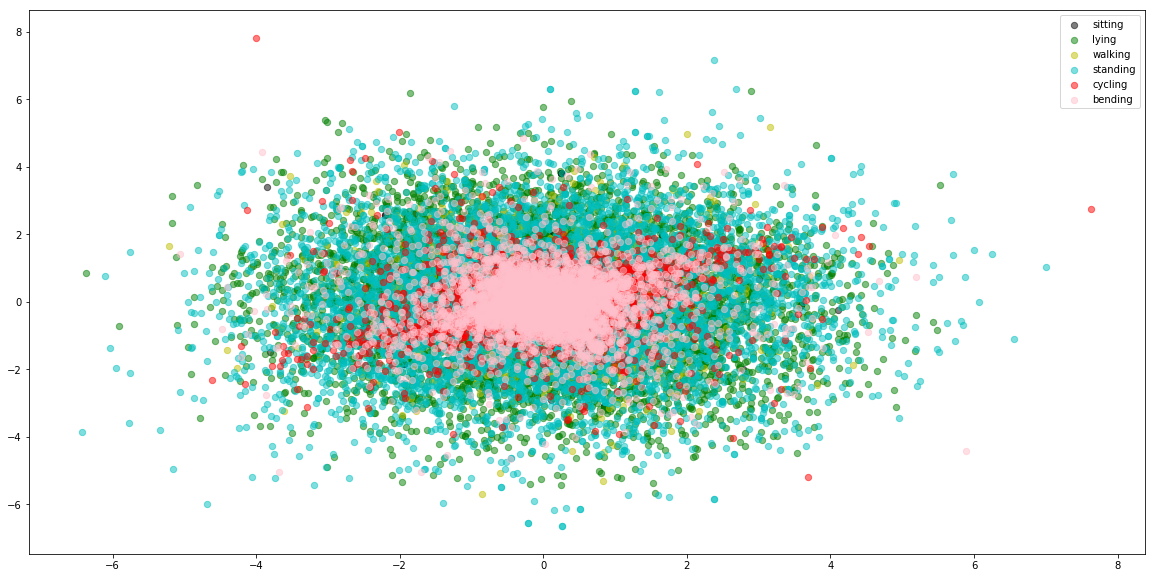

In [38]:
projected=pca.fit_transform(pmatrix_scale)
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
colors=["black","g","y","c","r","pink"]
for i, C in zip([1,2,3,4,5,0],colors):
    index_i= np.array(np.where(task_number==i))-1
    index_i=np.array(list(chain.from_iterable(index_i)))
    ax.scatter(projected[index_i,0],projected[index_i,1],c=C,alpha=0.5,cmap="hsv",s=40)    
ax.legend(task_category)

## 2.Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

In [39]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [40]:
K6=cluster.KMeans(n_clusters=6)
K6.fit(pmatrix_scale)
pose_cluster=K6.labels_

The following function to draw the confusion matrix is from the website: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [41]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[8.31848552e-01 8.35189310e-04 4.63530067e-02 3.74443207e-02
  3.86971047e-02 4.48218263e-02]
 [9.34307585e-01 1.11343076e-03 1.68406402e-02 1.40570633e-02
  1.51704941e-02 1.85107864e-02]
 [1.77313848e-01 1.69519833e-01 1.55601949e-01 1.75922060e-01
  1.65901183e-01 1.55741127e-01]
 [8.68197634e-01 1.80932498e-03 3.42379958e-02 3.08977035e-02
  3.39596381e-02 3.08977035e-02]
 [1.59359777e-01 1.52818372e-01 1.74808629e-01 1.51565762e-01
  1.67710508e-01 1.93736952e-01]
 [8.51774530e-01 4.81772924e-03 4.99437932e-02 2.00738718e-02
  2.07162357e-02 5.26738397e-02]]


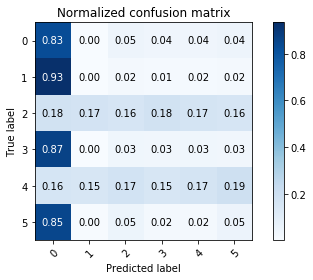

In [42]:
plot_confusion_matrix(task_number,pose_cluster, np.arange(6), normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[5976    6  333  269  278  322]
 [6713    8  121  101  109  133]
 [1274 1218 1118 1264 1192 1119]
 [6238   13  246  222  244  222]
 [1145 1098 1256 1089 1205 1392]
 [5304   30  311  125  129  328]]


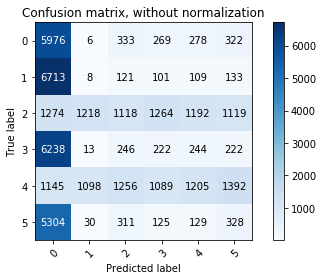

In [63]:
plot_confusion_matrix(task_number,pose_cluster, np.arange(6), normalize=False)

In [64]:
print("The accuracy is about "+str((6713+1256+1264+30+244+322)/42239))

The accuracy is about 0.23269963777551553


<font color="blue"> The result is really bad. We can not figure out a single label by this model.

## 3.Standardize the data and train an HMM with an appropriately chosen emission distribution.  How much does the hidden state overlap with the 'task' variable?  

In [43]:
import hmmlearn.hmm as hmm
model1=hmm.GaussianHMM(n_components=6,n_iter=10)

In [47]:
lengths=[]
k=len(index0)
for i in np.arange(k-1):
    lengths.append(np.array(-index0[i]+index0[i+1]))
lengths.append(index[-1]+1-index0[-1]+1)
lengths=np.array(lengths)

In [48]:
pose_hmm=sc.fit_transform(np.array(poses)[:,2:8])

In [49]:
model1.startprob_=np.array([0.2,0.2,0.15,0.15,0.15,0.15])
model1.fit(pose_hmm,lengths)
ghmm_result=model1.predict(pose_hmm,lengths)

The normalized Confusion Matrix is (where we can see the recall): 

Normalized confusion matrix
[[1.60855674e-01 1.06959300e-01 5.73135158e-01 2.91707182e-03
  1.52799000e-03 1.54604806e-01]
 [9.26388889e-01 1.55555556e-02 1.22222222e-02 0.00000000e+00
  5.55555556e-04 4.52777778e-02]
 [0.00000000e+00 9.97222222e-02 0.00000000e+00 0.00000000e+00
  9.00138889e-01 1.38888889e-04]
 [1.20694444e-01 9.84722222e-02 7.53194444e-01 0.00000000e+00
  1.38888889e-04 2.75000000e-02]
 [4.16666667e-04 5.60555556e-01 5.55555556e-04 0.00000000e+00
  4.37638889e-01 8.33333333e-04]
 [5.33653846e-02 4.27884615e-02 1.34134615e-01 4.09134615e-01
  1.25000000e-02 3.48076923e-01]]


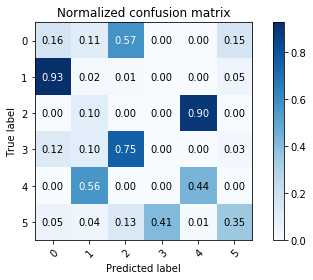

In [50]:
plot_confusion_matrix(task_hmm,ghmm_result, np.arange(6), normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[1158  770 4126   21   11 1113]
 [6670  112   88    0    4  326]
 [   0  718    0    0 6481    1]
 [ 869  709 5423    0    1  198]
 [   3 4036    4    0 3151    6]
 [ 333  267  837 2553   78 2172]]


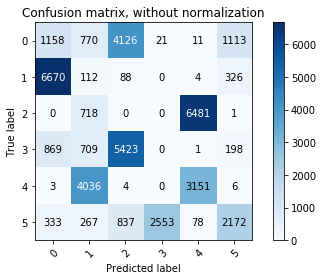

In [65]:
plot_confusion_matrix(task_hmm,ghmm_result, np.arange(6), normalize=False)

In [66]:
print("The accuracy is about "+str((6670+6481+5423+4036+2553+1113)/42239))

The accuracy is about 0.622079121191316


<font color="blue">The result seems OK. At least better than K-means. we can figure out the recall of true label $1$ and $2$ is pretty high. and the precision of predicted label $0$, $3$ and $4$ are more than 0.6.

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

__Exercise 3__ (40 pts)


Load the housing.csv dataset, your task is to predict the Sale price.  Deal with the missing data by simple imputation and by creating missingness indicator variables.  Train random forests, gradient tree boosting (XGBoost), K-nearest neighbors, and kernel SVMs.  Compare them using appropriate cross-validation.

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

In [20]:
housing=pd.read_csv("housing.csv")
print(housing.dtypes.unique())
housing.head(10)

[dtype('int64') dtype('O') dtype('float64')]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<font color="blue">Filling the NaNs as follows:

In [21]:
house_filled=housing
for column in house_filled.columns:
    if house_filled[column].dtype=="int64":
        house_filled[column]=house_filled[column].fillna(np.mean(house_filled[column]))
    if house_filled[column].dtype=="O":
        house_filled[column]=house_filled[column].fillna("Unknown")
    if house_filled[column].dtype=="float64":
        house_filled[column]=house_filled[column].fillna(np.mean(house_filled[column]))

<font color="blue">Scaling the numerical features as follows:

In [22]:
for column in house_filled.columns:
    if house_filled[column].dtype=="int64":
        house_filled[column]=sc.fit_transform(np.array(house_filled[column]).reshape(-1, 1) )
    if house_filled[column].dtype=="float64":
        house_filled[column]=sc.fit_transform(np.array(house_filled[column]).reshape(-1, 1) )

<font color="blue"> Turn them into matrices.

In [23]:
X=house_filled.drop(["SalePrice"],axis=1)
X=pd.get_dummies(X)
X=X.as_matrix()
X=X[:,1:]
y=house_filled["SalePrice"]
y=y.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<font color="blue">Get the training set and test set so that we can do model selection on the training set, and model evaluation on the test set.

In [24]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y)

## 1.Train random forests

In [25]:
from sklearn.ensemble import RandomForestRegressor

<p>
    <font color="blue">
        On the training set, we fit the model by cross validation(with 5 folders).

In [68]:
param_grid={
    "max_depth": [4,8,12,16,20,32,64],
    "max_features":[10,20,30],
    "n_estimators":[10,50,100,200],
    "min_samples_split":[2,5],
    "min_samples_leaf":[1,2,5]
}
rf=RandomForestRegressor()
rf_grid=model_selection.GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 8, 12, 16, 20,

In [69]:
print("The best model is "+str(rf_grid.best_estimator_))
print("The training score is "+str(rf_grid.best_score_))
print("To evaluate the model on the test set, the score is "+str(rf_grid.best_estimator_.score(X_test,y_test)))

The best model is RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=32,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
The training score is 0.8450488014442082
To evaluate the model on the test set, the score is 0.8576501449365632


## 2.Train XGBoost

In [51]:
import xgboost as xgb

<font color="blue">Fitting the model with train set, by cross validation with 5 folders. Since the parameters to tune are more complicated than randomforest, we choose fewer parameters this time. With the expierence of max_depth in Random Forest, we choose 10,20,30 this time.

In [70]:
param_grid={
    "max_depth": [10,20,30],
    "learning rate": [0.01,0.05,0.1],
    "reg_alpha":[0.1,0.2,0.5,1],
    "reg_lambda":[0.1,0.2,0.5,1]
}
XGB=xgb.XGBRegressor()
XGB_grid=model_selection.GridSearchCV(estimator=XGB,param_grid=param_grid,cv=5)
XGB_grid.fit(X_train,y_train)

[20:49:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:26] WARNI

[20:51:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:26] WARNI

[20:53:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:58] WARNI

[20:56:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:03] WARNI

[21:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:41] WARNI

[21:03:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:50] WARNI

[21:05:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:48] WARNI

[21:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:42] WARNI

[21:11:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:07] WARNI

[21:15:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:59] WARNI

[21:18:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:51] WARNI

[21:20:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:59] WARNI

[21:23:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNI

[21:27:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:42] WARNI

[21:31:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:32] WARNI

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 20, 30],
         

In [71]:
print("The best model is "+str(XGB_grid.best_estimator_))
print("The training score is "+str(XGB_grid.best_score_))
print("To evaluate the model on the test set, the score is "+str(XGB_grid.best_estimator_.score(X_test,y_test)))

The best model is XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning rate=0.01, learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
The training score is 0.8279443178563275
To evaluate the model on the test set, the score is 0.8215366201908263


## 3.K-nearest neighbors

<font color="blue"> With 5 folder cross validation, we use the training set to fit the model.

In [72]:
param_grid={
    "n_neighbors":[5,10,15,20,30,35,40,45,50],
}
knn=neighbors.KNeighborsRegressor()
knn_grid=model_selection.GridSearchCV(estimator=knn,param_grid=param_grid,cv=5)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 35, 40, 45, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
print("The best model is "+str(knn_grid.best_estimator_))
print("The training score is "+str(knn_grid.best_score_))
print("To evaluate the model on the test set, the score is "+str(knn_grid.best_estimator_.score(X_test,y_test)))

The best model is KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')
The training score is 0.7513781421434248
To evaluate the model on the test set, the score is 0.7835482730445821


## 4.SVM

<font color="blue">Fitting the model with train set, by cross validation with 5 folders.

In [59]:
SVR=svm.SVR()
param_grid={
    "kernel": ["rbf","poly","sigmoid"],
    "C": [2,5,8,10,15,20,30,50],
    "gamma":["scale"],
}
svr_grid=model_selection.GridSearchCV(estimator=SVR,param_grid=param_grid,cv=5)
svr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [2, 5, 8, 10, 15, 20, 30, 50], 'gamma': ['scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
print("For the nonlinear kernels:")
print("The best model is "+str(svr_grid.best_estimator_))
print("The training score is "+str(svr_grid.best_score_))
print("To evaluate the model on the test set, the score is "+str(svr_grid.best_estimator_.score(X_test,y_test)))

For the nonlinear kernels:
The best model is SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The training score is 0.8370123987143625
To evaluate the model on the test set, the score is 0.879664984890089


<font color="blue">For the linear situation, we need to change the C to avoid overflow(I think the reason maybe it overflows, since everytime I applying $C>10$, the cell seems to run forever). Therefore, we begin to fit the model as bellow:

In [61]:
param_grid={
    "kernel": ["linear"],
    "C": [0.01, 0.1,0.2,0.5,1,2],
    "gamma":["scale"],
}
svr_grid=model_selection.GridSearchCV(estimator=SVR,param_grid=param_grid,cv=5)
svr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 1, 2], 'gamma': ['scale'],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
print("The best model is "+str(svr_grid.best_estimator_))
print("The training score is "+str(svr_grid.best_score_))
print("To evaluate the model on the test set, the score is "+str(svr_grid.best_estimator_.score(X_test,y_test)))

The best model is SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The training score is 0.8246186520095297
To evaluate the model on the test set, the score is 0.8503564862627083


## 5. Summary on the 4 different models

| With best estimators\Model types | Random Forest      | XGBoost            | kNN                | SVM(nonlinear kernel) | SVM(linear kernel) |
|----------------------------------|--------------------|--------------------|--------------------|-----------------------|--------------------|
| Score on test set                | 0.856 | 0.822 | 0.784 | 0.880    | 0.850 |

<font color="blue"> In coclusion, we can see that SVM and Random Forest have no significant difference on the $R^2$ score. However, XGBoost's and kNN's performances are way worse than SVM and Random Forest. 